In [1]:
# Import necessary libraries
import cv2
import torch
import numpy as np

# Load a video
cap = cv2.VideoCapture('/home/louis/Documents/gatech/Summer2023/Multimodal-Deep-Regression/data/video_packs/video_pack_1000/7117343959055191302.mp4')  # replace with your video file path

frames = []
frame_count = 0

while(cap.isOpened()):
    ret, frame = cap.read()  # Read a frame
    if ret == False:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
    frame = cv2.resize(frame, (72, 128))  # Resize to your ConvLSTM dimensions
    frame = frame.transpose((2, 0, 1))  # Change dimensions order to CxHxW
    frames.append(frame)
    frame_count += 1
    if frame_count >= 5:
        break

cap.release()

# Normalize and convert list to PyTorch tensor
#frames = [np.array(frame)/255 for frame in frames]  # Normalizing data
frames = np.stack(frames)  # Convert list to numpy array
frames = np.transpose(frames, (1, 0, 2, 3))  # Transpose to CxTxFxHxW
input_data = torch.from_numpy(frames)  # Convert to PyTorch tensor
input_data = input_data.unsqueeze(0)  # Add an extra dimension for batch
input_data.size()

torch.Size([1, 3, 5, 128, 72])

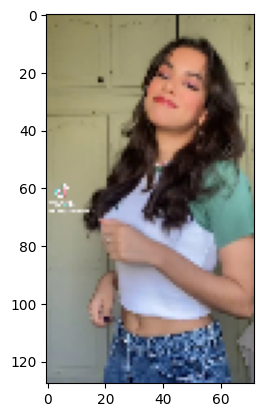

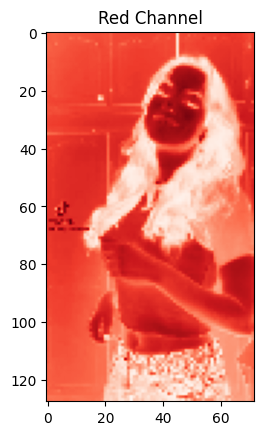

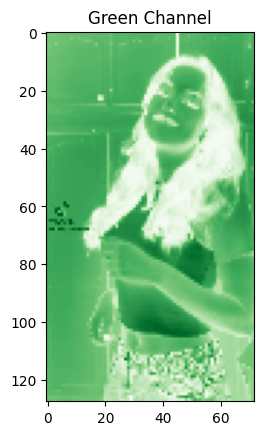

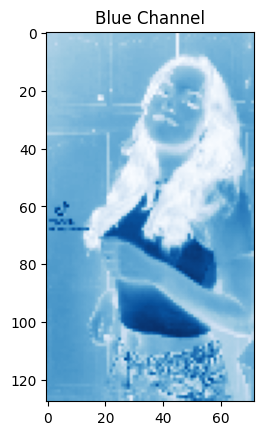

In [2]:
import matplotlib.pyplot as plt

# select the video & frame
video = 1
frame = 3

# select a frame
image_tensor = input_data[0] [:,frame,:,:]
numpy_image = image_tensor.detach().numpy()

# imshow (Height, Width, Channels)
numpy_image = numpy_image.transpose((1, 2, 0))

# normalize to 0,1
numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

plt.imshow(numpy_image)
plt.show()

# Red channel
plt.imshow(numpy_image[:,:,0], cmap='Reds')
plt.title("Red Channel")
plt.show()

# Green channel
plt.imshow(numpy_image[:,:,1], cmap='Greens')
plt.title("Green Channel")
plt.show()

# Blue channel
plt.imshow(numpy_image[:,:,2], cmap='Blues')
plt.title("Blue Channel")
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
import random
import time

# Create Batches with DataLoaders
batch_size = 1
train_loader = list(zip(input_data, input_data)) #TensorDataset(x_train, y_train)
train_loader = DataLoader(train_loader, batch_size=batch_size, shuffle=True)

In [4]:
# This need to same as the main & preprocess
frames_to_skip=200 # how many frame to skip, reduce depth
shrink=8 # shrink H x W, the higher the smaller scale
normalize=False # normalize the pixel to 0 to 1

In [5]:
H = 1024//shrink
W = 576//shrink
H,W

(128, 72)

In [6]:
import torch
import matplotlib.pyplot as plt

def check():
    outputs = model(input_data.to(torch.float32))

    # select a frame
    image_tensor = outputs.squeeze()[:,3,:,:]
    numpy_image = image_tensor.detach().numpy()

    # imshow (Height, Width, Channels)
    numpy_image = numpy_image.transpose((1, 2, 0))

    # normalize to 0,1
    numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

    plt.imshow(numpy_image)
    plt.show()

Total parameters: 1,041,859
First epoch took 0.0 minutes.
Epoch 1/100, Train_Loss: 2876.69, Avg: 2876.69
Epoch 2/100, Train_Loss: 2871.02, Avg: 2871.02
Epoch 3/100, Train_Loss: 2865.29, Avg: 2865.29
Epoch 4/100, Train_Loss: 2858.97, Avg: 2858.97
Epoch 5/100, Train_Loss: 2851.63, Avg: 2851.63
Epoch 6/100, Train_Loss: 2842.72, Avg: 2842.72
Epoch 7/100, Train_Loss: 2831.67, Avg: 2831.67
Epoch 8/100, Train_Loss: 2817.76, Avg: 2817.76
Epoch 9/100, Train_Loss: 2799.98, Avg: 2799.98
Epoch 10/100, Train_Loss: 2777.19, Avg: 2777.19


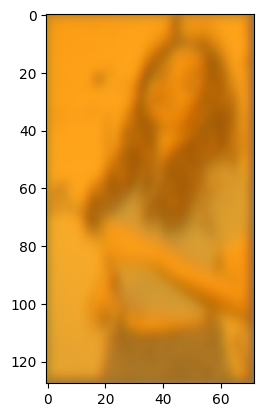

Epoch 11/100, Train_Loss: 2748.01, Avg: 2748.01
Epoch 12/100, Train_Loss: 2710.74, Avg: 2710.74
Epoch 13/100, Train_Loss: 2663.22, Avg: 2663.22
Epoch 14/100, Train_Loss: 2602.76, Avg: 2602.76
Epoch 15/100, Train_Loss: 2526.43, Avg: 2526.43
Epoch 16/100, Train_Loss: 2431.44, Avg: 2431.44
Epoch 17/100, Train_Loss: 2316.16, Avg: 2316.16
Epoch 18/100, Train_Loss: 2180.87, Avg: 2180.87
Epoch 19/100, Train_Loss: 2028.31, Avg: 2028.31
Epoch 20/100, Train_Loss: 1865.29, Avg: 1865.29


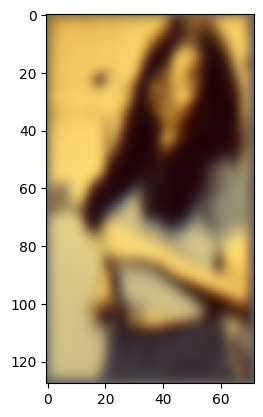

Epoch 21/100, Train_Loss: 1707.49, Avg: 1707.49
Epoch 22/100, Train_Loss: 1577.15, Avg: 1577.15
Epoch 23/100, Train_Loss: 1497.98, Avg: 1497.98
Epoch 24/100, Train_Loss: 1465.35, Avg: 1465.35
Epoch 25/100, Train_Loss: 1436.67, Avg: 1436.67
Epoch 26/100, Train_Loss: 1382.72, Avg: 1382.72
Epoch 27/100, Train_Loss: 1319.09, Avg: 1319.09
Epoch 28/100, Train_Loss: 1277.35, Avg: 1277.35
Epoch 29/100, Train_Loss: 1258.78, Avg: 1258.78
Epoch 30/100, Train_Loss: 1247.56, Avg: 1247.56


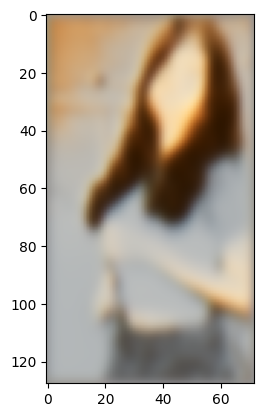

Epoch 31/100, Train_Loss: 1228.53, Avg: 1228.53
Epoch 32/100, Train_Loss: 1200.12, Avg: 1200.12
Epoch 33/100, Train_Loss: 1154.29, Avg: 1154.29
Epoch 34/100, Train_Loss: 1109.14, Avg: 1109.14
Epoch 35/100, Train_Loss: 1078.46, Avg: 1078.46
Epoch 36/100, Train_Loss: 1067.35, Avg: 1067.35
Epoch 37/100, Train_Loss: 1058.35, Avg: 1058.35
Epoch 38/100, Train_Loss: 1041.96, Avg: 1041.96
Epoch 39/100, Train_Loss: 1016.47, Avg: 1016.47
Epoch 40/100, Train_Loss: 990.27, Avg: 990.27


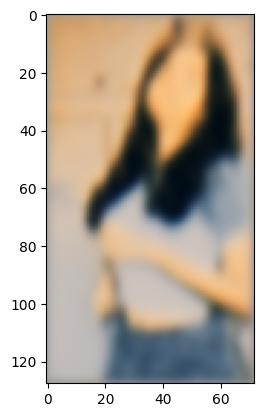

Epoch 41/100, Train_Loss: 970.16, Avg: 970.16
Epoch 42/100, Train_Loss: 957.19, Avg: 957.19
Epoch 43/100, Train_Loss: 944.70, Avg: 944.70
Epoch 44/100, Train_Loss: 926.03, Avg: 926.03
Epoch 45/100, Train_Loss: 902.41, Avg: 902.41
Epoch 46/100, Train_Loss: 879.29, Avg: 879.29
Epoch 47/100, Train_Loss: 859.33, Avg: 859.33
Epoch 48/100, Train_Loss: 841.71, Avg: 841.71
Epoch 49/100, Train_Loss: 828.57, Avg: 828.57
Epoch 50/100, Train_Loss: 858.92, Avg: 858.92


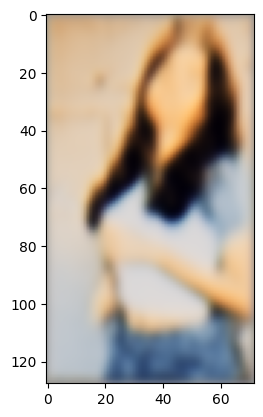

Epoch 51/100, Train_Loss: 951.33, Avg: 951.33
Epoch 52/100, Train_Loss: 810.98, Avg: 810.98
Epoch 53/100, Train_Loss: 995.60, Avg: 995.60
Epoch 54/100, Train_Loss: 775.88, Avg: 775.88
Epoch 55/100, Train_Loss: 905.80, Avg: 905.80
Epoch 56/100, Train_Loss: 817.82, Avg: 817.82
Epoch 57/100, Train_Loss: 772.46, Avg: 772.46
Epoch 58/100, Train_Loss: 848.51, Avg: 848.51
Epoch 59/100, Train_Loss: 740.17, Avg: 740.17
Epoch 60/100, Train_Loss: 786.95, Avg: 786.95


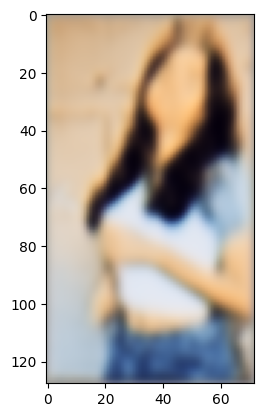

Epoch 61/100, Train_Loss: 792.05, Avg: 792.05
Epoch 62/100, Train_Loss: 727.16, Avg: 727.16
Epoch 63/100, Train_Loss: 750.88, Avg: 750.88
Epoch 64/100, Train_Loss: 753.35, Avg: 753.35
Epoch 65/100, Train_Loss: 704.77, Avg: 704.77
Epoch 66/100, Train_Loss: 729.12, Avg: 729.12
Epoch 67/100, Train_Loss: 723.23, Avg: 723.23
Epoch 68/100, Train_Loss: 686.07, Avg: 686.07
Epoch 69/100, Train_Loss: 704.86, Avg: 704.86
Epoch 70/100, Train_Loss: 693.08, Avg: 693.08


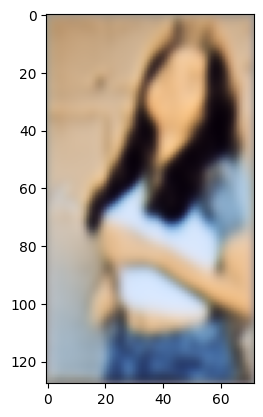

Epoch 71/100, Train_Loss: 669.86, Avg: 669.86
Epoch 72/100, Train_Loss: 686.35, Avg: 686.35
Epoch 73/100, Train_Loss: 666.57, Avg: 666.57
Epoch 74/100, Train_Loss: 656.72, Avg: 656.72
Epoch 75/100, Train_Loss: 666.21, Avg: 666.21
Epoch 76/100, Train_Loss: 641.96, Avg: 641.96
Epoch 77/100, Train_Loss: 648.67, Avg: 648.67
Epoch 78/100, Train_Loss: 640.58, Avg: 640.58
Epoch 79/100, Train_Loss: 628.50, Avg: 628.50
Epoch 80/100, Train_Loss: 634.90, Avg: 634.90


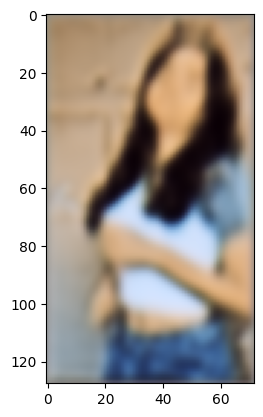

Epoch 81/100, Train_Loss: 618.22, Avg: 618.22
Epoch 82/100, Train_Loss: 621.61, Avg: 621.61
Epoch 83/100, Train_Loss: 613.83, Avg: 613.83
Epoch 84/100, Train_Loss: 607.13, Avg: 607.13
Epoch 85/100, Train_Loss: 607.93, Avg: 607.93
Epoch 86/100, Train_Loss: 596.60, Avg: 596.60
Epoch 87/100, Train_Loss: 598.84, Avg: 598.84
Epoch 88/100, Train_Loss: 589.19, Avg: 589.19
Epoch 89/100, Train_Loss: 588.53, Avg: 588.53
Epoch 90/100, Train_Loss: 582.79, Avg: 582.79


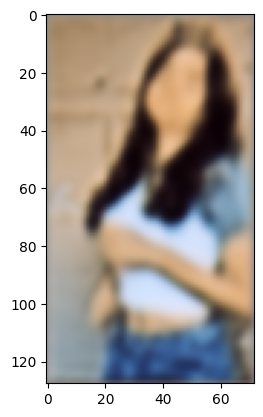

Epoch 91/100, Train_Loss: 579.01, Avg: 579.01
Epoch 92/100, Train_Loss: 576.48, Avg: 576.48
Epoch 93/100, Train_Loss: 570.63, Avg: 570.63
Epoch 94/100, Train_Loss: 569.74, Avg: 569.74
Epoch 95/100, Train_Loss: 563.60, Avg: 563.60
Epoch 96/100, Train_Loss: 563.17, Avg: 563.17
Epoch 97/100, Train_Loss: 557.28, Avg: 557.28
Epoch 98/100, Train_Loss: 556.79, Avg: 556.79
Epoch 99/100, Train_Loss: 551.52, Avg: 551.52
Epoch 100/100, Train_Loss: 550.66, Avg: 550.66


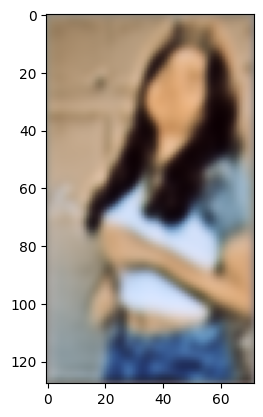

In [7]:
import sys
sys.path.append("..")
from models import ConvLSTMAutoencoder
from util.utilities import train, evaluate, get_device

model = ConvLSTMAutoencoder(hidden_dim=256//4, shrink=shrink, normalize=normalize)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")

EPOCHS = 100

train_losses = []
val_losses = []
start_time = time.time()

for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer)
    #val_loss, avg_val_loss = evaluate(model, val_loader, criterion)
    
    # record the losses
    train_losses.append(avg_train_loss)
    #val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}')
    if ((epoch+1) % 10 == 0):
        check()

First epoch took 2.9 minutes.
Epoch 1/100, Train_Loss: 546.14, Avg: 546.14
Epoch 2/100, Train_Loss: 544.75, Avg: 544.75
Epoch 3/100, Train_Loss: 541.27, Avg: 541.27
Epoch 4/100, Train_Loss: 539.11, Avg: 539.11
Epoch 5/100, Train_Loss: 536.87, Avg: 536.87
Epoch 6/100, Train_Loss: 533.86, Avg: 533.86
Epoch 7/100, Train_Loss: 532.62, Avg: 532.62
Epoch 8/100, Train_Loss: 529.26, Avg: 529.26
Epoch 9/100, Train_Loss: 528.18, Avg: 528.18
Epoch 10/100, Train_Loss: 525.36, Avg: 525.36


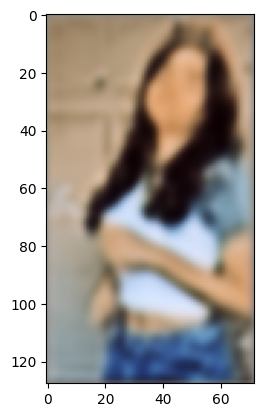

Epoch 11/100, Train_Loss: 523.61, Avg: 523.61
Epoch 12/100, Train_Loss: 521.83, Avg: 521.83
Epoch 13/100, Train_Loss: 519.34, Avg: 519.34
Epoch 14/100, Train_Loss: 518.15, Avg: 518.15
Epoch 15/100, Train_Loss: 515.78, Avg: 515.78
Epoch 16/100, Train_Loss: 514.12, Avg: 514.12
Epoch 17/100, Train_Loss: 512.56, Avg: 512.56
Epoch 18/100, Train_Loss: 510.36, Avg: 510.36
Epoch 19/100, Train_Loss: 509.02, Avg: 509.02
Epoch 20/100, Train_Loss: 507.21, Avg: 507.21


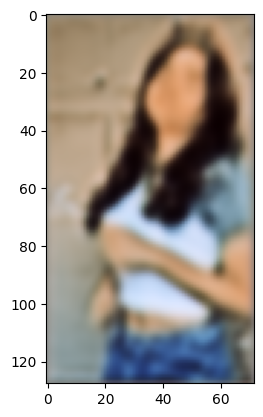

Epoch 21/100, Train_Loss: 505.31, Avg: 505.31
Epoch 22/100, Train_Loss: 503.97, Avg: 503.97
Epoch 23/100, Train_Loss: 502.15, Avg: 502.15
Epoch 24/100, Train_Loss: 500.38, Avg: 500.38
Epoch 25/100, Train_Loss: 498.99, Avg: 498.99
Epoch 26/100, Train_Loss: 497.29, Avg: 497.29
Epoch 27/100, Train_Loss: 495.51, Avg: 495.51
Epoch 28/100, Train_Loss: 494.07, Avg: 494.07
Epoch 29/100, Train_Loss: 492.55, Avg: 492.55
Epoch 30/100, Train_Loss: 490.81, Avg: 490.81


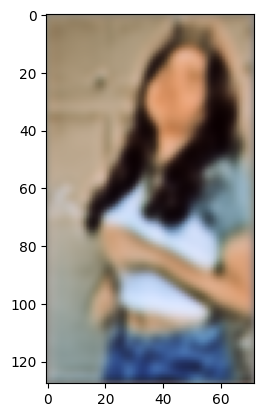

Epoch 31/100, Train_Loss: 489.19, Avg: 489.19
Epoch 32/100, Train_Loss: 487.73, Avg: 487.73
Epoch 33/100, Train_Loss: 486.23, Avg: 486.23
Epoch 34/100, Train_Loss: 484.58, Avg: 484.58
Epoch 35/100, Train_Loss: 482.92, Avg: 482.92
Epoch 36/100, Train_Loss: 481.33, Avg: 481.33
Epoch 37/100, Train_Loss: 479.83, Avg: 479.83
Epoch 38/100, Train_Loss: 478.44, Avg: 478.44
Epoch 39/100, Train_Loss: 477.25, Avg: 477.25
Epoch 40/100, Train_Loss: 476.45, Avg: 476.45


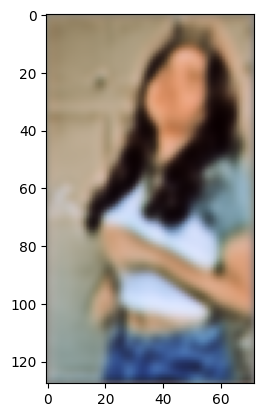

Epoch 41/100, Train_Loss: 476.19, Avg: 476.19
Epoch 42/100, Train_Loss: 476.23, Avg: 476.23
Epoch 43/100, Train_Loss: 475.68, Avg: 475.68
Epoch 44/100, Train_Loss: 473.61, Avg: 473.61
Epoch 45/100, Train_Loss: 470.32, Avg: 470.32
Epoch 46/100, Train_Loss: 467.28, Avg: 467.28
Epoch 47/100, Train_Loss: 465.69, Avg: 465.69
Epoch 48/100, Train_Loss: 465.35, Avg: 465.35
Epoch 49/100, Train_Loss: 465.33, Avg: 465.33
Epoch 50/100, Train_Loss: 464.78, Avg: 464.78


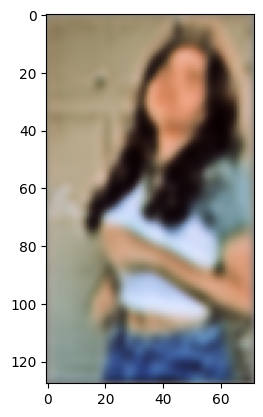

Epoch 51/100, Train_Loss: 463.25, Avg: 463.25
Epoch 52/100, Train_Loss: 460.95, Avg: 460.95
Epoch 53/100, Train_Loss: 458.50, Avg: 458.50
Epoch 54/100, Train_Loss: 456.50, Avg: 456.50
Epoch 55/100, Train_Loss: 455.11, Avg: 455.11
Epoch 56/100, Train_Loss: 454.23, Avg: 454.23
Epoch 57/100, Train_Loss: 453.69, Avg: 453.69
Epoch 58/100, Train_Loss: 453.44, Avg: 453.44
Epoch 59/100, Train_Loss: 453.50, Avg: 453.50
Epoch 60/100, Train_Loss: 453.96, Avg: 453.96


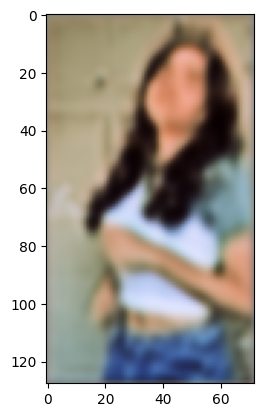

Epoch 61/100, Train_Loss: 454.80, Avg: 454.80
Epoch 62/100, Train_Loss: 455.48, Avg: 455.48
Epoch 63/100, Train_Loss: 454.76, Avg: 454.76
Epoch 64/100, Train_Loss: 451.50, Avg: 451.50
Epoch 65/100, Train_Loss: 446.42, Avg: 446.42
Epoch 66/100, Train_Loss: 442.35, Avg: 442.35
Epoch 67/100, Train_Loss: 441.21, Avg: 441.21
Epoch 68/100, Train_Loss: 442.28, Avg: 442.28
Epoch 69/100, Train_Loss: 443.45, Avg: 443.45
Epoch 70/100, Train_Loss: 443.01, Avg: 443.01


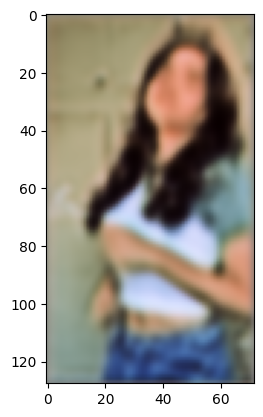

Epoch 71/100, Train_Loss: 440.51, Avg: 440.51
Epoch 72/100, Train_Loss: 437.02, Avg: 437.02
Epoch 73/100, Train_Loss: 434.31, Avg: 434.31
Epoch 74/100, Train_Loss: 433.18, Avg: 433.18
Epoch 75/100, Train_Loss: 433.25, Avg: 433.25
Epoch 76/100, Train_Loss: 433.75, Avg: 433.75
Epoch 77/100, Train_Loss: 433.99, Avg: 433.99
Epoch 78/100, Train_Loss: 433.38, Avg: 433.38
Epoch 79/100, Train_Loss: 431.69, Avg: 431.69
Epoch 80/100, Train_Loss: 429.31, Avg: 429.31


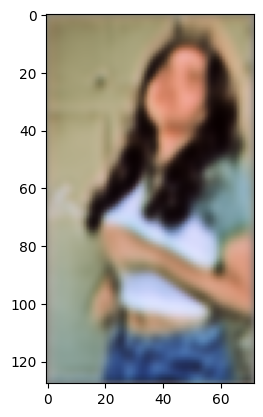

Epoch 81/100, Train_Loss: 426.80, Avg: 426.80
Epoch 82/100, Train_Loss: 424.67, Avg: 424.67
Epoch 83/100, Train_Loss: 423.16, Avg: 423.16
Epoch 84/100, Train_Loss: 422.23, Avg: 422.23
Epoch 85/100, Train_Loss: 421.70, Avg: 421.70
Epoch 86/100, Train_Loss: 421.50, Avg: 421.50
Epoch 87/100, Train_Loss: 421.74, Avg: 421.74
Epoch 88/100, Train_Loss: 422.72, Avg: 422.72
Epoch 89/100, Train_Loss: 424.99, Avg: 424.99
Epoch 90/100, Train_Loss: 428.72, Avg: 428.72


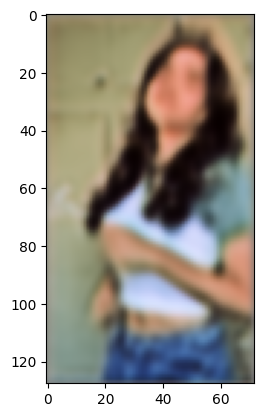

Epoch 91/100, Train_Loss: 432.81, Avg: 432.81
Epoch 92/100, Train_Loss: 433.12, Avg: 433.12
Epoch 93/100, Train_Loss: 425.95, Avg: 425.95
Epoch 94/100, Train_Loss: 415.09, Avg: 415.09
Epoch 95/100, Train_Loss: 410.99, Avg: 410.99
Epoch 96/100, Train_Loss: 415.34, Avg: 415.34
Epoch 97/100, Train_Loss: 418.77, Avg: 418.77
Epoch 98/100, Train_Loss: 414.66, Avg: 414.66
Epoch 99/100, Train_Loss: 407.80, Avg: 407.80
Epoch 100/100, Train_Loss: 406.36, Avg: 406.36


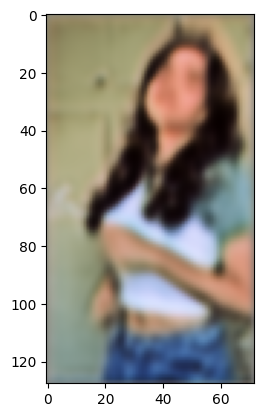

In [8]:
for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer)
    #val_loss, avg_val_loss = evaluate(model, val_loader, criterion)
    
    # record the losses
    train_losses.append(avg_train_loss)
    #val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}')
    if ((epoch+1) % 10 == 0):
        check()